# YOLOv8 모델 비교 분석

YOLOv8 Small과 YOLOv8 Medium의 성능 비교

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 결과 로드
results_s = pd.read_csv('./results/yolov8s_pcb/results.csv')
results_m = pd.read_csv('./results/yolov8m_pcb/results.csv')

# 최고 성능 찾기
best_s_idx = results_s['metrics/mAP50(B)'].idxmax()
best_m_idx = results_m['metrics/mAP50(B)'].idxmax()

best_s = results_s.iloc[best_s_idx]
best_m = results_m.iloc[best_m_idx]

# 성능 비교표
print("모델 성능 비교")
print("=" * 60)

comparison = pd.DataFrame({
    '지표': ['mAP50', 'mAP50-95', 'Precision', 'Recall', 'Best Epoch', '학습 시간', '모델 크기'],
    'YOLOv8s': [
        f"{best_s['metrics/mAP50(B)']:.3f} ({best_s['metrics/mAP50(B)']*100:.1f}%)",
        f"{best_s['metrics/mAP50-95(B)']:.3f} ({best_s['metrics/mAP50-95(B)']*100:.1f}%)",
        f"{best_s['metrics/precision(B)']:.3f} ({best_s['metrics/precision(B)']*100:.1f}%)",
        f"{best_s['metrics/recall(B)']:.3f} ({best_s['metrics/recall(B)']*100:.1f}%)",
        f"{int(best_s['epoch'])}",
        '6분',
        '22.5MB'
    ],
    'YOLOv8m': [
        f"{best_m['metrics/mAP50(B)']:.3f} ({best_m['metrics/mAP50(B)']*100:.1f}%)",
        f"{best_m['metrics/mAP50-95(B)']:.3f} ({best_m['metrics/mAP50-95(B)']*100:.1f}%)",
        f"{best_m['metrics/precision(B)']:.3f} ({best_m['metrics/precision(B)']*100:.1f}%)",
        f"{best_m['metrics/recall(B)']:.3f} ({best_m['metrics/recall(B)']*100:.1f}%)",
        f"{int(best_m['epoch'])}",
        '10분',
        '52.0MB'
    ],
    '개선': [
        f"+{(best_m['metrics/mAP50(B)'] - best_s['metrics/mAP50(B)'])*100:.1f}%p",
        f"+{(best_m['metrics/mAP50-95(B)'] - best_s['metrics/mAP50-95(B)'])*100:.1f}%p",
        f"+{(best_m['metrics/precision(B)'] - best_s['metrics/precision(B)'])*100:.1f}%p",
        f"+{(best_m['metrics/recall(B)'] - best_s['metrics/recall(B)'])*100:.1f}%p",
        '-',
        '+4분',
        '+29.5MB'
    ]
})

print(comparison.to_string(index=False))

모델 성능 비교
        지표       YOLOv8s       YOLOv8m      개선
     mAP50 0.859 (85.9%) 0.903 (90.3%)  +4.4%p
  mAP50-95 0.406 (40.6%) 0.432 (43.2%)  +2.6%p
 Precision 0.919 (91.9%) 0.939 (93.9%)  +2.0%p
    Recall 0.780 (78.0%) 0.825 (82.5%)  +4.5%p
Best Epoch            49            49       -
     학습 시간            6분           10분     +4분
     모델 크기        22.5MB        52.0MB +29.5MB


In [2]:
# 클래스별 성능 비교
print("클래스별 성능 비교 (mAP50)")
print("=" * 60)

class_comparison = pd.DataFrame({
    'Class': ['Missing_hole', 'Mouse_bite', 'Open_circuit', 'Short', 'Spur', 'Spurious_copper'],
    'YOLOv8s': [0.986, 0.813, 0.810, 0.939, 0.806, 0.802],
    'YOLOv8m': [0.966, 0.888, 0.933, 0.956, 0.792, 0.883]
})

class_comparison['개선'] = class_comparison['YOLOv8m'] - class_comparison['YOLOv8s']
class_comparison['개선(%)'] = class_comparison['개선'] * 100

print(class_comparison.to_string(index=False))

# 가장 많이 개선된 클래스
max_improve = class_comparison.loc[class_comparison['개선'].idxmax()]
print(f"\n가장 많이 개선된 클래스: {max_improve['Class']} (+{max_improve['개선(%)']: .1f}%p)")

클래스별 성능 비교 (mAP50)
          Class  YOLOv8s  YOLOv8m     개선  개선(%)
   Missing_hole    0.986    0.966 -0.020   -2.0
     Mouse_bite    0.813    0.888  0.075    7.5
   Open_circuit    0.810    0.933  0.123   12.3
          Short    0.939    0.956  0.017    1.7
           Spur    0.806    0.792 -0.014   -1.4
Spurious_copper    0.802    0.883  0.081    8.1

가장 많이 개선된 클래스: Open_circuit (+ 12.3%p)


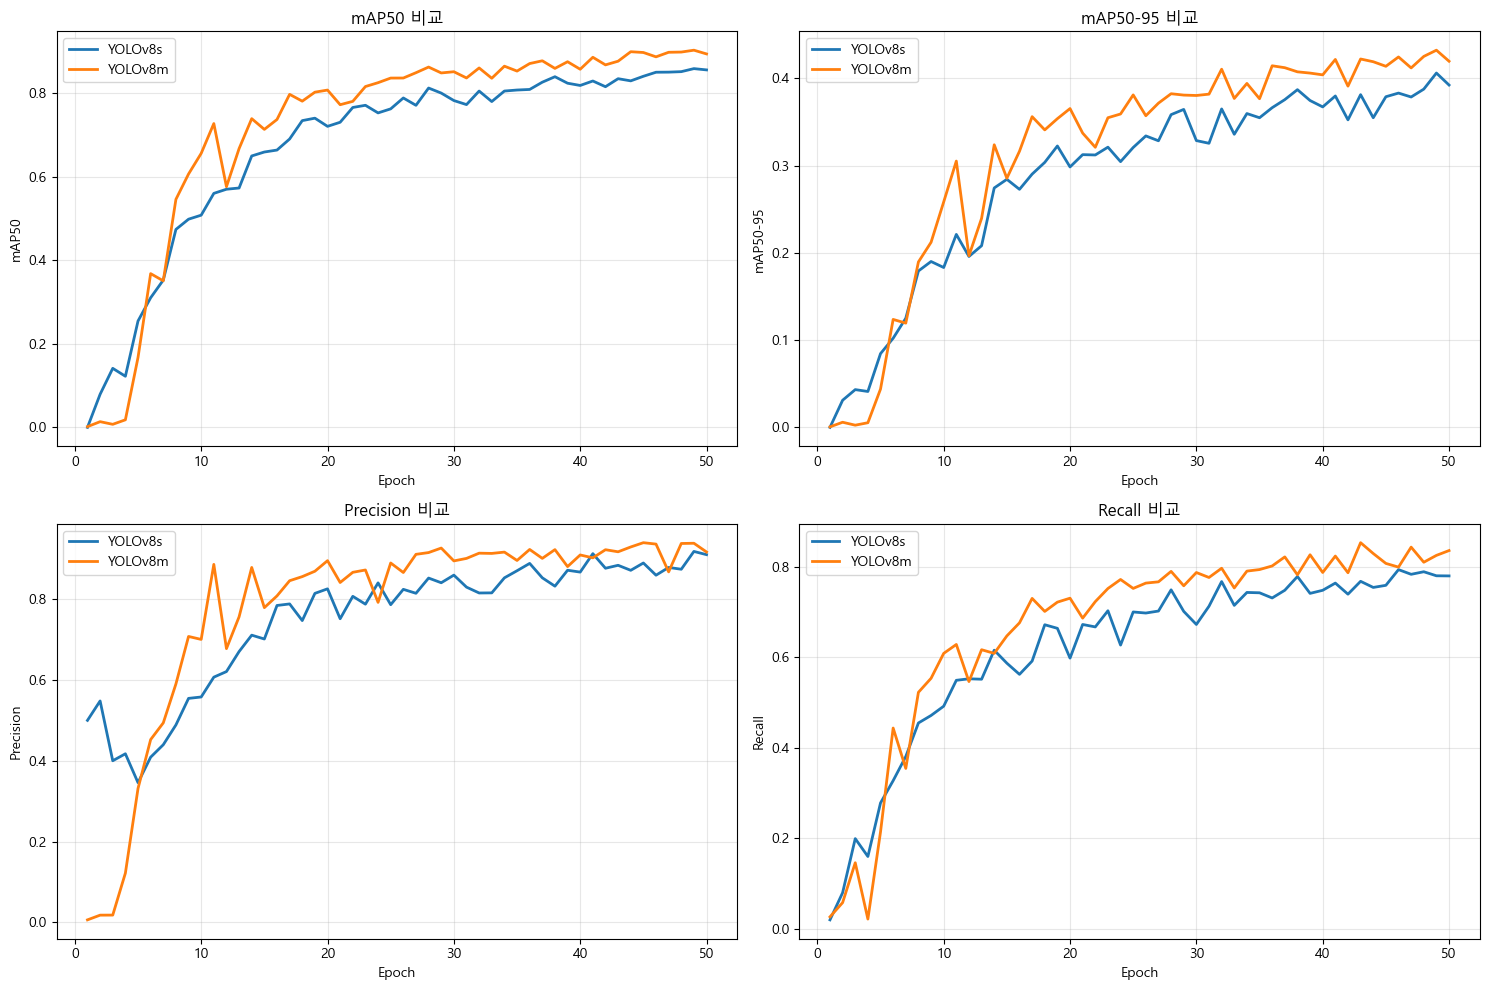

In [3]:
# 학습 곡선 비교
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# mAP50
axes[0, 0].plot(results_s['epoch'], results_s['metrics/mAP50(B)'], label='YOLOv8s', linewidth=2)
axes[0, 0].plot(results_m['epoch'], results_m['metrics/mAP50(B)'], label='YOLOv8m', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('mAP50')
axes[0, 0].set_title('mAP50 비교')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# mAP50-95
axes[0, 1].plot(results_s['epoch'], results_s['metrics/mAP50-95(B)'], label='YOLOv8s', linewidth=2)
axes[0, 1].plot(results_m['epoch'], results_m['metrics/mAP50-95(B)'], label='YOLOv8m', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('mAP50-95')
axes[0, 1].set_title('mAP50-95 비교')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Precision
axes[1, 0].plot(results_s['epoch'], results_s['metrics/precision(B)'], label='YOLOv8s', linewidth=2)
axes[1, 0].plot(results_m['epoch'], results_m['metrics/precision(B)'], label='YOLOv8m', linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision 비교')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Recall
axes[1, 1].plot(results_s['epoch'], results_s['metrics/recall(B)'], label='YOLOv8s', linewidth=2)
axes[1, 1].plot(results_m['epoch'], results_m['metrics/recall(B)'], label='YOLOv8m', linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Recall 비교')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

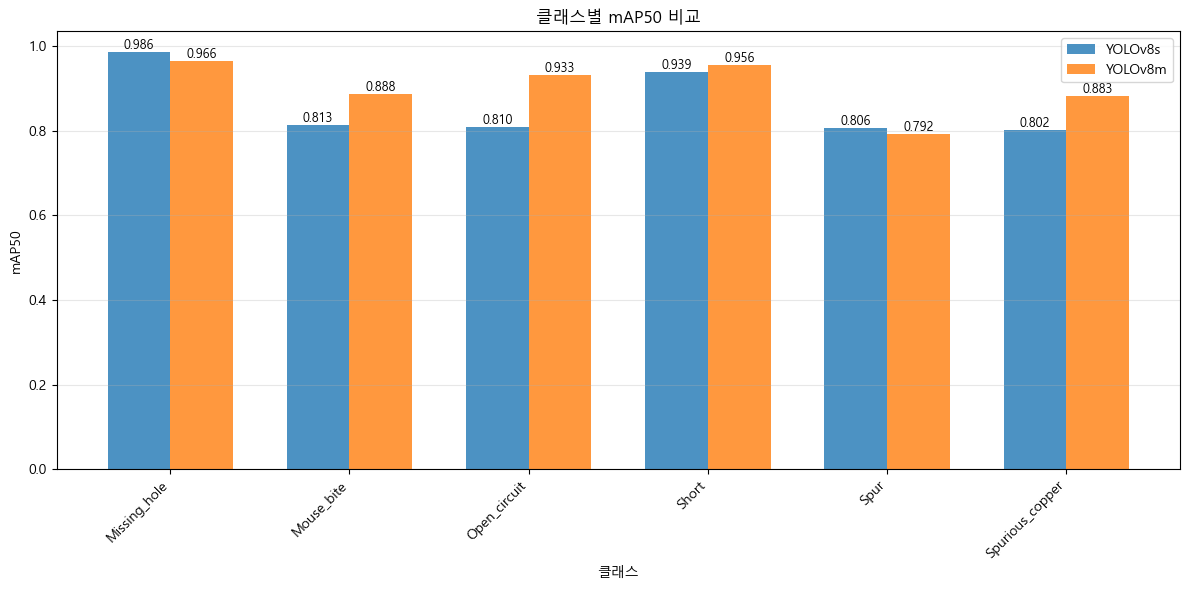

In [4]:
# 클래스별 mAP50 비교 막대 그래프
fig, ax = plt.subplots(figsize=(12, 6))

classes = class_comparison['Class']
x = range(len(classes))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], class_comparison['YOLOv8s'], 
               width, label='YOLOv8s', alpha=0.8)
bars2 = ax.bar([i + width/2 for i in x], class_comparison['YOLOv8m'], 
               width, label='YOLOv8m', alpha=0.8)

ax.set_xlabel('클래스')
ax.set_ylabel('mAP50')
ax.set_title('클래스별 mAP50 비교')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# 값 표시
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 최종 결론

### YOLOv8m 선택 이유

1. **전체 성능 우수**
   - mAP50: 90.3% (YOLOv8s 대비 +4.4%p)
   - Recall: 82.5% (결함 미검출 감소)

2. **Open_circuit 클래스 대폭 개선**
   - 81.0% → 93.3% (+12.3%p)
   - YOLOv8s의 가장 큰 약점 해결

3. **안정적인 성능**
   - 모든 클래스 mAP50 79% 이상
   - 최저/최고 성능 차이 감소

4. **합리적인 Trade-off**
   - 모델 크기: +29.5MB (실시간 추론에 무리 없음)
   - 학습 시간: +4분 (일회성 비용)
   - 성능 향상이 비용 증가를 충분히 보상

### 최종 선정 모델: YOLOv8m